In [1]:
import numpy as np
import xarray as xr

import xmitgcm
import xgcm

import matplotlib.pyplot as plt
%matplotlib inline

### Load ASTE output

In [2]:
astemd = xmitgcm.utils.get_extra_metadata(domain='aste', nx=270)

In [3]:
astemd

{'has_faces': True,
 'ny': 1350,
 'nx': 270,
 'ny_facets': [450, 0, 270, 180, 450],
 'pad_before_y': [90, 0, 0, 0, 0],
 'pad_after_y': [0, 0, 0, 90, 90],
 'face_facets': [0, 0, 2, 3, 4, 4],
 'facet_orders': ['C', 'C', 'C', 'F', 'F'],
 'face_offsets': [0, 1, 0, 0, 0, 1],
 'transpose_face': [False, False, False, True, True, True]}

In [4]:
dir_spunup_diags = '/rigel/ocpbgc/users/lm3391/tmpdir_runs/ASTE/OLD-RUNS/tmpdir_ASTE-BLING-RAF-RDOC+rivers-SpunUp-REF01/diags/'
dir_aste_grid = '/rigel/ocpbgc/users/rd2847/ASTE/Release1/grid'

In [5]:
ds = xmitgcm.open_mdsdataset(dir_spunup_diags, prefix=['state_3d_set1','state_2d_set1',
                                                       'trsp_3d_set1','trsp_2d_set1','exf_zflux_set1'], 
                             geometry='llc', nx=270, 
                             read_grid=True, grid_dir=dir_aste_grid,
                             extra_metadata=astemd, 
                             ignore_unknown_vars=True,
                             delta_t=1200, ref_date='2002-1-1')

/rigel/home/jt2796/miniconda/envs/default/lib/python3.7/site-packages/xmitgcm/mds_store.py:837: UserWarning: Couldn't find available_diagnostics.log in /rigel/ocpbgc/users/lm3391/tmpdir_runs/ASTE/OLD-RUNS/tmpdir_ASTE-BLING-RAF-RDOC+rivers-SpunUp-REF01/diags/ or /rigel/ocpbgc/users/rd2847/ASTE/Release1/grid. Using default version.
  "in %s or %s. Using default version." % (data_dir, grid_dir))
/rigel/home/jt2796/miniconda/envs/default/lib/python3.7/site-packages/xmitgcm/mds_store.py:837: UserWarning: Couldn't find available_diagnostics.log in /rigel/ocpbgc/users/lm3391/tmpdir_runs/ASTE/OLD-RUNS/tmpdir_ASTE-BLING-RAF-RDOC+rivers-SpunUp-REF01/diags/ or /rigel/ocpbgc/users/rd2847/ASTE/Release1/grid. Using default version.
  "in %s or %s. Using default version." % (data_dir, grid_dir))
/rigel/home/jt2796/miniconda/envs/default/lib/python3.7/site-packages/xmitgcm/mds_store.py:837: UserWarning: Couldn't find available_diagnostics.log in /rigel/ocpbgc/users/lm3391/tmpdir_runs/ASTE/OLD-RUNS/tmp

In [6]:
ds

<xarray.Dataset>
Dimensions:   (face: 6, i: 270, i_g: 270, j: 270, j_g: 270, k: 50, k_l: 50, k_p1: 51, k_u: 50, time: 180)
Coordinates:
  * k_l       (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * j_g       (j_g) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * face      (face) int64 0 1 2 3 4 5
  * i         (i) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * k         (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * j         (j) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * k_p1      (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * k_u       (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * i_g       (i_g) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
    iter      (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time      (time) datetime64[ns] 2002-02-01 2002-03-01 ... 2017-01-01
    XC        (face, j, i) >f4 dask.array<chunksize=(1, 270, 270), meta=np.ndarray>
    YC        (face, j, i) >f4 dask.array<chunksize=(1, 270, 270), meta=np.ndarray>
    XG        (face, j_g, i_g) >f4 dask.array<chunksize=(1, 270, 270), meta=np.ndarray>
    YG        (face, j_g, i_g) >f4 dask.array<chunksize=(1, 270, 270), meta=np.ndarray>
    CS        (face, j, i) >f4 dask.array<chunksize=(1, 270, 270), meta=np.ndarray>
    SN        (face, j, i) >f4 dask.array<chunksize=(1, 270, 270), meta=np.ndarray>
    Z         (k) >f4 dask.array<chunksize=(50,), meta=np.ndarray>
    Zp1       (k_p1) >f4 dask.array<chunksize=(51,), meta=np.ndarray>
    Zu        (k_u) >f4 dask.array<chunksize=(50,), meta=np.ndarray>
    Zl        (k_l) >f4 dask.array<chunksize=(50,), meta=np.ndarray>
    rA        (face, j, i) >f4 dask.array<chunksize=(1, 270, 270), meta=np.ndarray>
    dxG       (face, j_g, i) >f4 dask.array<chunksize=(1, 270, 270), meta=np.ndarray>
    dyG       (face, j, i_g) >f4 dask.array<chunksize=(1, 270, 270), meta=np.ndarray>
    Depth     (face, j, i) >f4 dask.array<chunksize=(1, 270, 270), meta=np.ndarray>
    rAz       (face, j_g, i_g) >f4 dask.array<chunksize=(1, 270, 270), meta=np.ndarray>
    dxC       (face, j, i_g) >f4 dask.array<chunksize=(1, 270, 270), meta=np.ndarray>
    dyC       (face, j_g, i) >f4 dask.array<chunksize=(1, 270, 270), meta=np.ndarray>
    rAw       (face, j, i_g) >f4 dask.array<chunksize=(1, 270, 270), meta=np.ndarray>
    rAs       (face, j_g, i) >f4 dask.array<chunksize=(1, 270, 270), meta=np.ndarray>
    drC       (k_p1) >f4 dask.array<chunksize=(51,), meta=np.ndarray>
    drF       (k) >f4 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefC    (k) >f4 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF    (k_p1) >f4 dask.array<chunksize=(51,), meta=np.ndarray>
    hFacC     (k, face, j, i) >f4 dask.array<chunksize=(1, 1, 270, 270), meta=np.ndarray>
    hFacW     (k, face, j, i_g) >f4 dask.array<chunksize=(1, 1, 270, 270), meta=np.ndarray>
    hFacS     (k, face, j_g, i) >f4 dask.array<chunksize=(1, 1, 270, 270), meta=np.ndarray>
    maskC     (k, face, j, i) bool dask.array<chunksize=(1, 1, 270, 270), meta=np.ndarray>
    maskW     (k, face, j, i_g) bool dask.array<chunksize=(1, 1, 270, 270), meta=np.ndarray>
    maskS     (k, face, j_g, i) bool dask.array<chunksize=(1, 1, 270, 270), meta=np.ndarray>
    maskInC   (face, j, i) bool dask.array<chunksize=(1, 270, 270), meta=np.ndarray>
    maskInS   (face, j_g, i) bool dask.array<chunksize=(1, 270, 270), meta=np.ndarray>
    maskInW   (face, j, i_g) bool dask.array<chunksize=(1, 270, 270), meta=np.ndarray>
Data variables:
    UVELMASS  (time, k, face, j, i_g) float32 dask.array<chunksize=(1, 1, 1, 270, 270), meta=np.ndarray>
    VVELMASS  (time, k, face, j_g, i) float32 dask.array<chunksize=(1, 1, 1, 270, 270), meta=np.ndarray>
    EXFpreci  (time, face, j, i) float32 dask.array<chunksize=(1, 1, 270, 270), meta=np.ndarray>
    EXFevap   (time, face, j, i) float32 dask.array<chunksize=(1, 1, 270, 270

### Analysis

In [6]:
### Ocean depth
Depth = ds.Depth

### Grid dimensions
dxG = ds.dxG
dyG = ds.dyG
drF = ds.drF
rA = ds.rA
hFacC = ds.hFacC.load()

# Volume (m^3)
vol = (rA*drF*hFacC).transpose('face','k','j','i')

/rigel/home/jt2796/miniconda/envs/default/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
  if sys.path[0] == '':


<Figure size 1008x720 with 0 Axes>

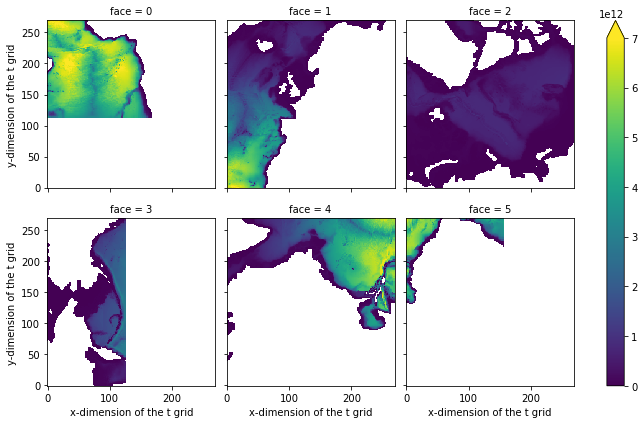

In [16]:
plt.figure(figsize=(14,10))
vol.sum('k').where(ds.maskC[0]==1).plot(col='face', col_wrap=3, vmin=0, vmax=7e12)

<Figure size 1008x720 with 0 Axes>

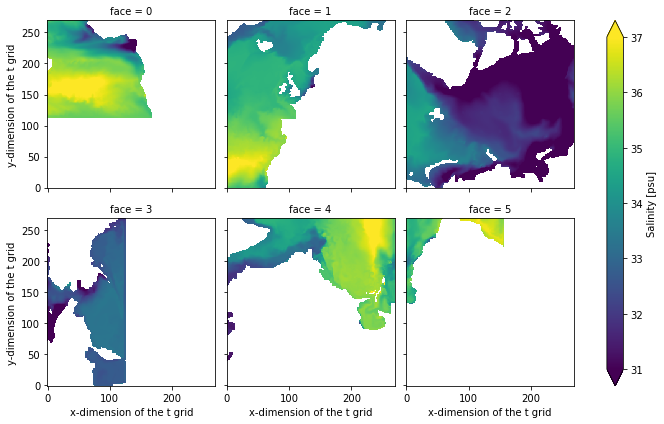

In [9]:
plt.figure(figsize=(14,10))
ds.SALT[-1,0].where(ds.maskC[0]==1).plot(col='face', col_wrap=3, vmin=31,vmax=37)

<Figure size 1008x720 with 0 Axes>

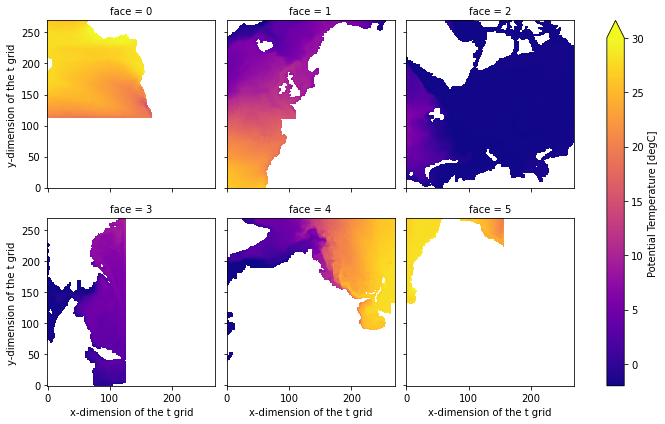

In [12]:
plt.figure(figsize=(14,10))
ds.THETA[-1,0].where(ds.maskC[0]==1).plot(col='face', col_wrap=3, cmap='plasma',vmin=-2,vmax=30)

### Plot tile/face structure

In [7]:
tile_order = np.array([-1, -1, 4, 5, \
                       -1, 2, 3, -1, \
                        1, -1, -1, -1, \
                        0, -1, -1, -1])

In [14]:
tiles = ds.SALT[-1,0].where(ds.maskC[0]==1)

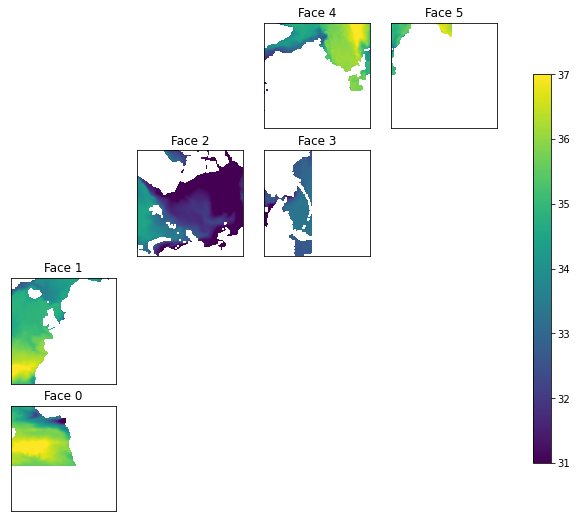

In [15]:
fig, axarr = plt.subplots(4,4, figsize=(10,9))

# loop through the axes array and plot tiles where tile_order != -1
for i, ax in enumerate(axarr.ravel()):
    ax.axis('off')
    cur_tile_num = tile_order[i]
    have_tile = False
    
    if cur_tile_num >= 0:
        if type(tiles) == np.ndarray:

            if tiles.shape[0] >= cur_tile_num -1:
                have_tile = True
                cur_tile = tiles[cur_tile_num -1]
                
        else:
            if cur_tile_num in tiles.face.values:
                have_tile = True
                cur_tile = tiles.sel(face=cur_tile_num)

        if have_tile:
            im=ax.imshow(cur_tile, vmin=31,vmax=37, cmap='viridis', origin='lower')
            
        ax.set_aspect('equal')
        ax.axis('on')
        ax.set_title('Face ' + str(cur_tile_num))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
# show the colorbar
fig.subplots_adjust(left=None, bottom=None, right=0.8)
#[left, bottom, width, height]
h=.6;w=.025
cbar_ax = fig.add_axes([0.85, (1-h)/2, w, h])
cbar = fig.colorbar(im, cax=cbar_ax)#, format='%.0e')        
#cbar.set_label(cbar_label)

In [8]:
# Define the connectivity between faces
face_connections = {'face':
                    {0: {'X':  ((5, 'Y', False), None),
                         'Y':  (None,             (1, 'Y', False))},
                     1: {'X':  ((4, 'Y', False), None),
                         'Y':  ((0, 'Y', False),  (2, 'X', False))},
                     2: {'X':  ((1, 'Y', False),  (3, 'X', False)),
                         'Y':  (None,             (4, 'X', False))},
                     3: {'X':  ((2, 'X', False), None),
                         'Y':  (None,            None)},
                     4: {'X':  ((2, 'Y', False),  (5, 'X', False)),
                         'Y':  (None,             (1, 'X', False))},
                     5: {'X':  ((4, 'X', False), None),
                         'Y':  (None,             (0, 'X', False))}}}

In [9]:
# Create the grid object
grid = xgcm.Grid(ds, periodic=False, face_connections=face_connections)

In [10]:
grid

<xgcm.Grid>
X Axis (not periodic):
  * center   i --> left
  * left     i_g --> center
Y Axis (not periodic):
  * center   j --> left
  * left     j_g --> center
T Axis (not periodic):
  * center   time
Z Axis (not periodic):
  * center   k --> left
  * left     k_l --> center
  * outer    k_p1 --> center
  * right    k_u --> center

### Convergence of hear advection (degC/s)

In [11]:
ADVx_TH = ds.ADVx_TH
ADVy_TH = ds.ADVy_TH

In [12]:
ADVxy_diff = grid.diff_2d_vector({'X' : ADVx_TH, 'Y' : ADVy_TH}, boundary = 'fill')

In [13]:
ADVx_diffx = ADVxy_diff['X']
ADVy_diffy = ADVxy_diff['Y']

In [14]:
# Convergence of horizontal advection (degC * m^3/s)
adv_hConvH = (-(ADVx_diffx + ADVy_diffy)).transpose('time','face','j','i')

# Convergence of horizontal advection (degC/s)
#adv_hConvH = (-(ADVx_diffx + ADVy_diffy)/vol.sum('k')).transpose('time','face','j','i')

<Figure size 1008x720 with 0 Axes>

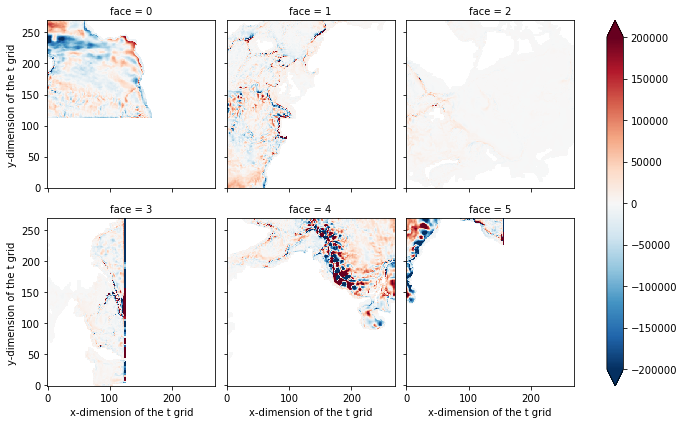

In [15]:
plt.figure(figsize=(14,10))
adv_hConvH[-1].where(ds.maskC[0]==1).plot(col='face', col_wrap=3, cmap='RdBu_r', vmin=-2e5,vmax=2e5)

In [16]:
tiles = adv_hConvH[-1].where(ds.maskC[0]==1)

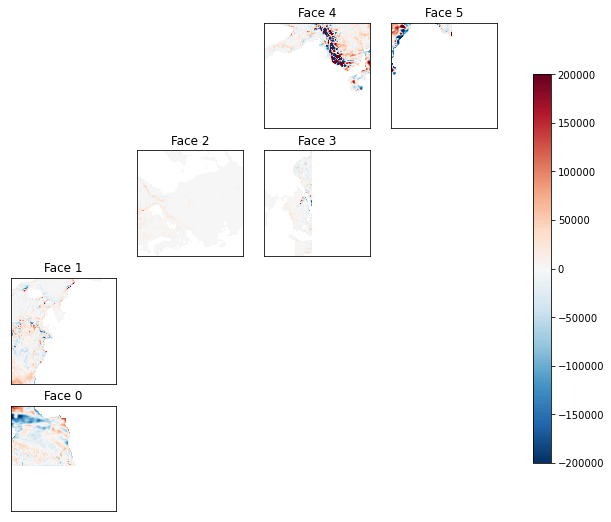

In [17]:
fig, axarr = plt.subplots(4,4, figsize=(10,9))

# loop through the axes array and plot tiles where tile_order != -1
for i, ax in enumerate(axarr.ravel()):
    ax.axis('off')
    cur_tile_num = tile_order[i]
    have_tile = False
    
    if cur_tile_num >= 0:
        if type(tiles) == np.ndarray:

            if tiles.shape[0] >= cur_tile_num -1:
                have_tile = True
                cur_tile = tiles[cur_tile_num -1]
                
        else:
            if cur_tile_num in tiles.face.values:
                have_tile = True
                cur_tile = tiles.sel(face=cur_tile_num)

        if have_tile:
            im=ax.imshow(cur_tile, cmap='RdBu_r', vmin=-2e5,vmax=2e5, origin='lower')
            
        ax.set_aspect('equal')
        ax.axis('on')
        ax.set_title('Face ' + str(cur_tile_num))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
# show the colorbar
fig.subplots_adjust(left=None, bottom=None, right=0.8)
#[left, bottom, width, height]
h=.6;w=.025
cbar_ax = fig.add_axes([0.85, (1-h)/2, w, h])
cbar = fig.colorbar(im, cax=cbar_ax)#, format='%.0e')        
#cbar.set_label(cbar_label)

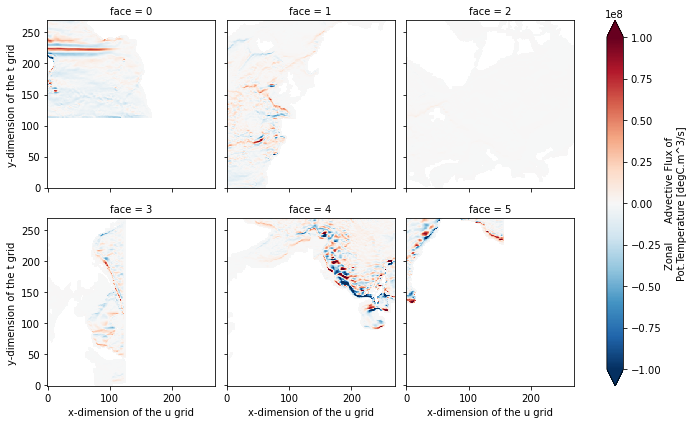

In [18]:
ADVx_TH[-1].where(ds.maskW[0]==1).plot(col='face', col_wrap=3, vmin=-1e8,vmax=1e8, cmap='RdBu_r')

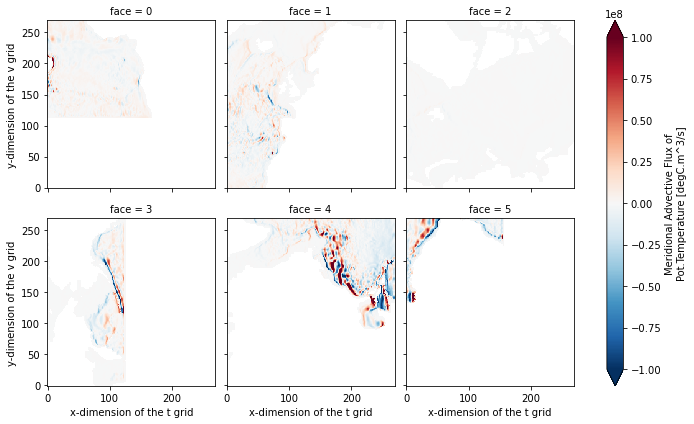

In [19]:
ADVy_TH[-1].where(ds.maskS[0]==1).plot(col='face', col_wrap=3, vmin=-1e8,vmax=1e8, cmap='RdBu_r')